# Support Vector Machines Lab

Within this lab, we will review:
* linear algebra fundamentals 
* the hard margin & the maximal margin classifier
* the soft margin & support vectors
* the kernel trick & support vector machines

In each section, you will see code examples with detailed commentary and visualization.

##  Linear Algebra Fundamentals

In this section, we will work with numpy arrays to demonstrate the creation of vectors and matrices, and perform basic linear algebra operations such as dot products and transposition.

In [266]:
import numpy as np

# previously in Python we used lists to express ordered arrangements of data
lst = [1, 2, 3]

# in linear algebra, we call this a vector
# we can express this as a one-dimensional numpy array (vector)
vector = np.array([1, 2, 3])

vector

array([1, 2, 3])

In [267]:
# previously in Python we used lists of lists to express highly dimensional data
lst_of_lst = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

# similarly we can express this using a 2-dimensional numpy array (matrix)
matrix = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])

matrix

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

The code above starts by importing the numpy library. We create a one-dimensional array named `vector` and a two-dimensional array named `matrix`. 

The matrix is defined with three rows and three columns (4 x 3 matrix). Note that we always define a matrix or vector by the number of its' rows first and then its' columns (RC cola).

We also often apply mathematical operations to these structures.

In [268]:
# we can apply a scalar value (a single value) to our arrays
matrix * 2

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18],
       [20, 22, 24]])

In [269]:
vector * 2

array([2, 4, 6])

In [270]:
vector + 2

array([3, 4, 5])

In [271]:
vector - 2

array([-1,  0,  1])

Note that we get the same output as the above when we express this as a multiplication operation between two vectors.

In [272]:
vector * np.array([2, 2, 2])

array([2, 4, 6])

In [273]:
# as well as addition
vector + np.array([2, 2, 2])

array([3, 4, 5])

In [274]:
# and subtraction
vector - np.array([2, 2, 2])

array([-1,  0,  1])

This hints that there's something more going on underneath the hood of numpy. This is what we call [broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html).

When we apply arithmetic operations to arrays of different dimensions, `numpy` vectorizes array operation to save us computational time. If you're interested as to how data scientists use this to save time (and money) check out this [talk by Dr.Burchell](https://www.youtube.com/watch?v=9_mhjjlKjDo).

Next, let's learn about matrix operations. 

In [275]:
# we can calculate a transpose on our matrix, notice how this "tilts" our original matrix
matrix_transposed = matrix.T
print(matrix_transposed)

[[ 1  4  7 10]
 [ 2  5  8 11]
 [ 3  6  9 12]]


This operation becomes highly relevant when calculating something called the [dot product](https://en.wikipedia.org/wiki/Dot_product) between two matrices.

The dot product is defined as the "inner product" between two matrices. This is algebraically defined as the sum of the products of corresponding rows & columns.

![dot product](https://algebra1course.wordpress.com/wp-content/uploads/2013/02/slide10.jpg)

As we will see later, we use this measure to calculate the "similarity" between two vectors.

We can only calculate a dot-product between two matrices if the number of columns in the first matrix lines up with the number of rows in the second. So while this will work... 

In [276]:
# 3 x 3 matrix
matrix1 = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
# 3 x 2 matrix
matrix2 = np.array([
    [1, 2],
    [3, 4],
    [5, 6]
])

dot_product = np.dot(matrix1, matrix2)

print(dot_product)

[[ 22  28]
 [ 49  64]
 [ 76 100]]


... this won't

In [277]:
# 3 x 3 matrix
matrix3 = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
# 2 x 3 matrix
matrix4 = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

dot_product = np.dot(matrix3, matrix4)

print(dot_product)

ValueError: shapes (3,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

To enable the dot product calculation between these two matrices, we can take the transpose of the second matrix to flip our rows & columns.

In [278]:
dot_product = np.dot(matrix3, matrix4.T)

print(dot_product)

[[ 14  32]
 [ 32  77]
 [ 50 122]]


While it is not necessary to take the transpose of our vector when applying a dot-product in `numpy`, we express the dot product operation with the transpose of the beta vector to ensure dimensions match.

In [279]:
# (1 x 3) vector
betas = np.array([1, 2, 3])

# (1 x 3) vector
X = np.array([4, 5, 6])

# Compute the dot product of the vector and the extracted column
dot_product = np.dot(betas.T, X)
print("B^T * X =", dot_product)

B^T * X = 32


## Understanding Hyperplanes and the Concept of Margins

In this section, we will visualize data points from two classes and illustrate a hyperplane that acts as a decision boundary. The hyperplane and margins are visualized on a 2D plot to help you understand how they separate data points.

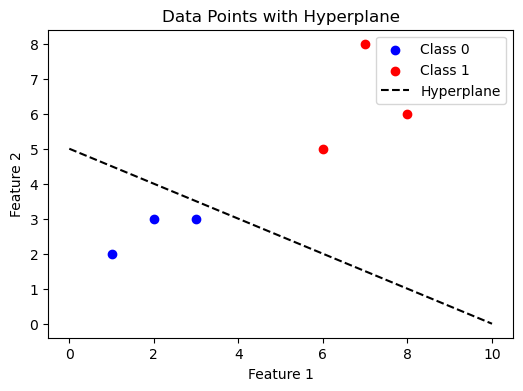

In [280]:
import matplotlib.pyplot as plt
import numpy as np

# define two sets of 2D data points for two classes
class0 = np.array([
    [1, 2],
    [2, 3],
    [3, 3]
])

class1 = np.array([
    [6, 5],
    [7, 8],
    [8, 6]
])

# create a scatter plot for both classes
plt.figure(figsize=(6, 4))
plt.scatter(class0[:, 0], class0[:, 1], color='blue', label='Class 0')
plt.scatter(class1[:, 0], class1[:, 1], color='red', label='Class 1')

# define a hyperplane using a simple linear equation (e.g., x2 = 5 - 0.5*x1)
x_vals = np.linspace(0, 10, 100)
# pseudo-coefficients
hyperplane = 5 - 0.5 * x_vals

# plot the hyperplane as a dashed line
plt.plot(x_vals, hyperplane, 'k--', label='Hyperplane')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points with Hyperplane')
plt.legend()
plt.show()

Let's see what a potential hyperplane would look like in 3-dimensions.

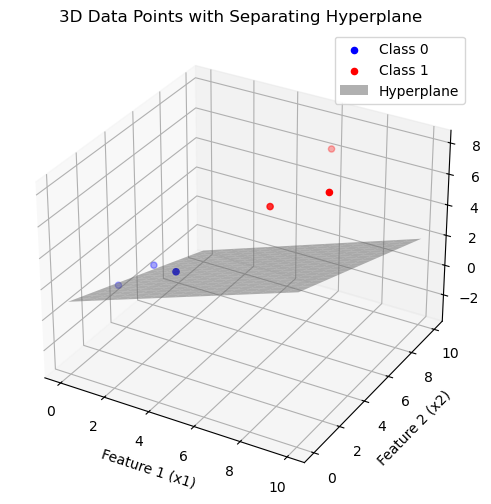

In [281]:
# define two sets of 3D data points for two classes
class0 = np.array([
    [1, 2, 1],
    [2, 3, 2],
    [3, 3, 2]
])

class1 = np.array([
    [6, 5, 6],
    [7, 8, 8],
    [8, 6, 7]
])

# create a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(class0[:, 0], class0[:, 1], class0[:, 2], color='blue', label='Class 0')
ax.scatter(class1[:, 0], class1[:, 1], class1[:, 2], color='red', label='Class 1')

# define the hyperplane: x3 = w0 + w1*x1 + w2*x2
# pseudo-coefficients
w0, w1, w2 = 1, 0.5, -0.4 
x1_range = np.linspace(0, 10, 20)
x2_range = np.linspace(0, 10, 20)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
x3_grid = w0 + w1 * x1_grid + w2 * x2_grid

# Plot the hyperplane
ax.plot_surface(x1_grid, x2_grid, x3_grid, alpha=0.5, color='gray', label='Hyperplane')

# Label axes
ax.set_xlabel('Feature 1 (x1)')
ax.set_ylabel('Feature 2 (x2)')
ax.set_zlabel('Feature 3 (x3)')
ax.set_title('3D Data Points with Separating Hyperplane')

ax.legend()
plt.show()

Here, we define two sets of points, each representing a different class(`class0` and `class1`). These points are plotted using `plt.scatter` with different colors. 

A hyperplane is defined by the **linear equation** x2 = 5 - 0.5 * x1 and is plotted as a dashed line using `plt.plot`.

## Implementing a Linear Support Vector Classifier (SVC) on the Bank Dataset

Now that we are familiar with the underpinnings of SVC, let's train a classifier using scikit-learn's `LinearSVC` on the bank marketing dataset (unrelated to TLAB 2). For more information on this dataset, check out the following [link](https://archive.ics.uci.edu/dataset/222/bank+marketing).

We will:
- Load the bank marketing dataset using pandas.
- Perform EDA.
- Split the dataset into training and testing sets.
- Iteratively tune the hyperparameter to determine the best value based on test accuracy for our Linear SVC.
- Evaluate results.

In [1]:
import pandas as pd

# TODO: import the bank dataset
bank = pd.read_csv("bank.csv")

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
bank.groupby("y")["age"].count()

y
no     4000
yes     521
Name: age, dtype: int64

In [283]:
# TODO: perform EDA!
...

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# perform one-hot-encoding on a set of categorical columns

# TODO: select your choice of categorical columns
cat_features = [...]                              
num_features = ["balance", "duration"]    

X_cat = bank[cat_features]
X_num = bank[num_features]

X_cat.head()

,job,marital,housing,contact
0,unemployed,married,no,cellular
1,services,married,yes,cellular
2,management,single,yes,cellular
3,management,married,yes,unknown
4,blue-collar,married,yes,unknown


In [285]:
ohe = OneHotEncoder()
X_cat_full = ohe.fit_transform(X_cat).toarray()

X_cat_full

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.]], shape=(4521, 20))

In [286]:
ohe.get_feature_names_out(cat_features)

array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'housing_no', 'housing_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown'], dtype=object)

In [287]:
cat_names = ohe.get_feature_names_out(cat_features)

encoded_df = pd.DataFrame(X_cat_full, columns=cat_names, index=bank.index)

encoded_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,housing_no,housing_yes,contact_cellular,contact_telephone,contact_unknown
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [288]:
X = pd.merge(X_num, encoded_df, left_index=True, right_index=True)

X

,balance,duration,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,housing_no,housing_yes,contact_cellular,contact_telephone,contact_unknown
0,1787,79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,4789,220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1350,185,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,1476,199,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,226,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-333,329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4517,-3313,153,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4518,295,151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4519,1137,129,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [289]:
# select the target
y = bank["y"]

In [ ]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

# TODO: perform a train test split
...

# initialize LinearSVC with regularization parameter C=1.0 and set max_iter for convergence
lin_svc = LinearSVC(C=1.0, max_iter=10000, random_state=42)

# train the classifier on the dataset
lin_svc.fit(X, y)

# make predictions on the same dataset
yhat = lin_svc.predict(X_test) 

confusion = confusion_matrix(y_test, yhat)
class_report = classification_report(y_test, yhat)

print("Confusion Matrix \n", confusion)
print("\nClassification Report\n", class_report)

Confusion Matrix 
 [[1182   23]
 [ 127   25]]

Classification Report
               precision    recall  f1-score   support

          no       0.90      0.98      0.94      1205
         yes       0.52      0.16      0.25       152

    accuracy                           0.89      1357
   macro avg       0.71      0.57      0.60      1357
weighted avg       0.86      0.89      0.86      1357



88%, not bad!

But how can we acheive better accuracy? 

That's right! Good old hyperparameter search.

In [ ]:
# TODO: implement random search on the LinearSVC model to find best hyperparams
# DOCS: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
param_grid = {
    ...
}

svc = LinearSVC(max_iter=10000)

# TODO: set up RandomizedSearchCV with 5-fold cross-validation
...

# TODO: fit this model on your training data
...

c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearSVC(max_iter=10000),
                   param_distributions={'C': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
                                        'penalty': ['l1', 'l2']})

Let's see how our best seperating linear hyperplane looks like on 2-dimensions of our highly-dimensional dataset.

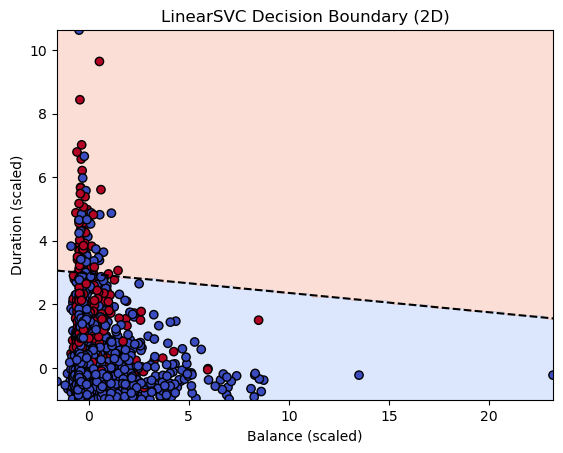

In [292]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Only use 2 numeric features
X_vis = bank[["balance", "duration"]]
y_vis = (bank["y"] == "yes").astype(int)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vis)

# Fit SVC on 2D data
best_svc = random_search.best_estimator_
best_svc.fit(X_scaled, y_vis)

# Plot
xx, yy = np.meshgrid(
    np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 100),
    np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 100)
)
zz = best_svc.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, zz > 0, alpha=0.3, cmap='coolwarm')
plt.contour(xx, yy, zz, levels=[0], colors='k', linestyles='--')  # Decision boundary
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_vis, cmap='coolwarm', edgecolors='k')
plt.xlabel("Balance (scaled)")
plt.ylabel("Duration (scaled)")
plt.title("LinearSVC Decision Boundary (2D)")
plt.show()

It seems like assuming a linear seperation is unrealistic (even when we find best hyperparameters). Let's explore non-linear decision boundaries.

## Exploring Non-Linear SVM and the Kernel Trick

This section introduces a non-linear Support Vector Machine. We explore the kernel trick using scikit-learn's `SVC` on a non-linearly separable dataset (an XOR pattern). A contour plot visualizes the decision boundary produced by the chosen kernel.

In [293]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# initialize a Support Vector Classifier with RBF kernel to handle non-linearity
svc_non_linear = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the classifier on the XOR dataset
svc_non_linear.fit(X_train, y_train)

# make predictions on the same dataset
yhat = svc_non_linear.predict(X_test)

confusion = confusion_matrix(y_test, yhat)
class_report = classification_report(y_test, yhat)

print("Confusion Matrix \n", confusion)
print("\nClassification Report:\n", class_report)

Confusion Matrix 
 [[1204    1]
 [ 152    0]]

Classification Report:
               precision    recall  f1-score   support

          no       0.89      1.00      0.94      1205
         yes       0.00      0.00      0.00       152

    accuracy                           0.89      1357
   macro avg       0.44      0.50      0.47      1357
weighted avg       0.79      0.89      0.83      1357



Look's like we get a pretty abysmal f1-score on `yes` cases. Let's do some hyperparameter search to try out different kernel functions. 

In [ ]:
# implement random search on the LinearSVC model to find best hyperparams
param_grid = {
    'C': np.linspace(0.1, 10, 100),
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4, 5]  
}

svc = SVC(max_iter=10000, random_state=42)

# TODO: set up RandomizedSearchCV with 5-fold cross-validation
...

# TODO: fit this model on your training data
...

c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\saidmf\anaconda3\envs\ds\Lib\site-packages\sklearn\svm\_base.py:305: Conver

RandomizedSearchCV(cv=5, estimator=SVC(max_iter=10000, random_state=42),
                   param_distributions={'C': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
                                        'degree': [2, 3, 4, 5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf', 'poly', 'sigmoid']})

In [295]:
best_svc = random_search.best_estimator_

# make predictions on the same dataset
yhat = best_svc.predict(X_test)

confusion = confusion_matrix(y_test, yhat)
class_report = classification_report(y_test, yhat)

print("Confusion Matrix \n", confusion)
print("\nClassification Report:\n", class_report)

Confusion Matrix 
 [[1200    5]
 [ 149    3]]

Classification Report:
               precision    recall  f1-score   support

          no       0.89      1.00      0.94      1205
         yes       0.38      0.02      0.04       152

    accuracy                           0.89      1357
   macro avg       0.63      0.51      0.49      1357
weighted avg       0.83      0.89      0.84      1357



Not only is our f1-score remaining low, but it also looks like we're getting some kind of warning. Let's inspect this message closer.

```
ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
```

Looks like we're failing to converge, which essentially indicates that our model is [failing to learn](https://www.reddit.com/r/learnmachinelearning/comments/1f8fjek/what_is_convergence/). However, the `sklearn` package is providing us a recommendation: `Consider pre-processing your data with StandardScaler or MinMaxScaler`. Let's use our knowledge of code from the knn lab to implement a min-max scaler on our dataset.

According to this [stackoverflow](https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati) link, we also have a couple of other options when it comes to solving this type of error.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# TODO: intialize the MinMaxScaler to scale data to the range [0, 1]
...

# TODO: fit on the training data, then transform both training and testing data
...
...

Now we can re-implement our SVC classifier on our scaled dataset. For good measure let's increase our `max_iter` as well.

In [ ]:
svc = SVC(max_iter=100000, random_state=42)

# TODO: set up RandomizedSearchCV with 5-fold cross-validation
...

# TODO: fit this model on your training data
...

RandomizedSearchCV(cv=5, estimator=SVC(max_iter=100000, random_state=42),
                   param_distributions={'C': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
                                        'degree': [2, 3, 4, 5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf', 'poly', 'sigmoid']})

In [299]:
best_svc = random_search.best_estimator_

# make predictions on the same dataset
yhat = best_svc.predict(X_test_scaled)

confusion = confusion_matrix(y_test, yhat)
class_report = classification_report(y_test, yhat)

print("Confusion Matrix \n", confusion)
print("\nClassification Report:\n", class_report)

Confusion Matrix 
 [[1196    9]
 [ 146    6]]

Classification Report:
               precision    recall  f1-score   support

          no       0.89      0.99      0.94      1205
         yes       0.40      0.04      0.07       152

    accuracy                           0.89      1357
   macro avg       0.65      0.52      0.51      1357
weighted avg       0.84      0.89      0.84      1357



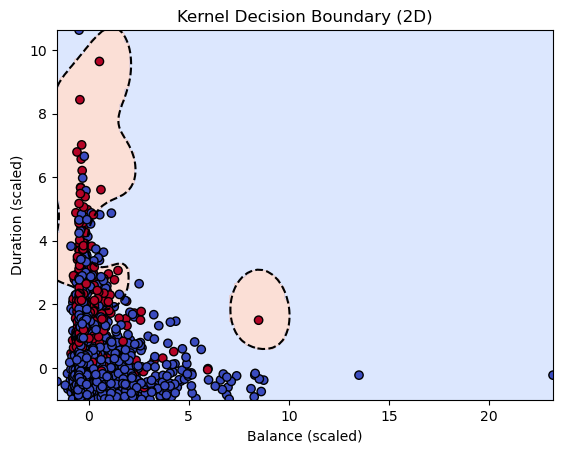

In [300]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Only use 2 numeric features
X_vis = bank[["balance", "duration"]]
y_vis = (bank["y"] == "yes").astype(int)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vis)

# Fit SVC on 2D data
best_svc = random_search.best_estimator_
best_svc.fit(X_scaled, y_vis)

# Plot
xx, yy = np.meshgrid(
    np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 100),
    np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 100)
)
zz = best_svc.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, zz > 0, alpha=0.3, cmap='coolwarm')
plt.contour(xx, yy, zz, levels=[0], colors='k', linestyles='--')  # Decision boundary
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_vis, cmap='coolwarm', edgecolors='k')
plt.xlabel("Balance (scaled)")
plt.ylabel("Duration (scaled)")
plt.title("Kernel Decision Boundary (2D)")
plt.show()